<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_chd/blob/main/DS3001_Project_2_Report_(Group_17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DS3001 Project 2 (Group 17)**

Isabella Dressel, Camila Gutierrez, Catherine Nguyen, Rhiannon Staley

## **Summary**

The Framingham Heart Study began in 1948 to investigate the factors associated with coronary heart disease. The study was conducted on a sample population of adults in Framingham, Massachusetts, across multiple generations. When the study began over 70 years ago, little was known about the disease. Conclusions could only be made based on mortality statistics or clinical studies. It was decided that the best way to learn more about this disease was through studying a normal population of people. From there, prevention and treatment techniques could be developed based on the study’s findings. A hypothesis going into this study was that there are multiple contributing factors that eventually led to a person developing CHD, including constitutional (hereditary), conditioning (environmental), and time factors. In this project, we are given many of these factors and tasked with using various predictive methods to predict the likelihood a person develops coronary heart disease (CHD) based on these given factors. We used three main methods to predict the outcome variable TenYearCHD: multiple linear regression, regression trees, and KNN. After fitting models on the train data and evaluating on the test data, we calculated R-squared and used this as our metric to measure model performance. For our best model, we found that including all variables rather than narrowing down the number used to fit our models resulted in the best model performance. This indicates that all the factors had some influence on the model predictions. An essential aspect of using these predictive methods was finding optimal parameter values to improve our models such as tree depth for regression trees and k neighbors for KNN. Out of all methods that we tried, regression trees resulted in our highest R-squared value and thus, was our best model to predict the likelihood a person develops coronary heart disease.


In [1]:
# clone from repo
! git clone https://github.com/Catherine-Nguyen88/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 219 (delta 114), reused 70 (delta 62), pack-reused 74
Receiving objects: 100% (219/219), 7.98 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

## **Data**

The data used was from the Framingham Study which began in 1948 through the US Public Health Service in Massachusetts. 5,209 men and women were studied in this longitudinal investigation of what leads to cardiovascular disease (CVD). By further understanding the risk factors that lead to CVD, this research intends to highlight the incidence rates of disease. 32 clinical exams and an event follow-up collected data up until 2018. Our specific project focuses on building predictive algorithms that predict if an individual develops CHD. We used 8 dependent variables (sex, currentSmoker, cigsPerDay, diabetes, totChol, sysBP, diaBP, and BMI) and 1 independent variable (TenYearCHD) in our research. Sex is the recorded sex of the participant with 1 designating males, diabetes is whether the participant has diabetes as of the first exam, totChol is the total cholesterol (mg/dL), sysBP is systolic blood pressure (mmHg), and BMI is body mass index (weight (kg)/height (m^2)). Finally, TenYearCHD was 1 when a patient developed coronary heart disease within 10 years of the exam. For all the variables, NAs were dropped. The timeline analyzed was 1948 to 2018 to contrast possible differences correlations in risk factors and developing CHD. The data were cleaned in Cleaning_Variables.ipynb and extracted in project1_extract_data.ipynb. Additionally, NaNs were dropped and outliers were removed before building the models to remove the most extreme observations as defined through boxplots. Specific upper limits were placed on each of the variables with extreme observations: 'diaBP' <150, 'glucose'<200, 'totChol'<400, and 'heartRate'<120.  

Fortunately, we did not run into many, if any, challenges with the dataset, as it was already split into the training and test sets for us. Additionally, all variables were numerical, and we chose not to transform the data.

In [3]:
# Read in and clean data
train_data = pd.read_csv('./project_chd/fhs_train.csv')
test_data = pd.read_csv('./project_chd/fhs_test.csv')

# clean training data
train_data1 = train_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
train_final = train_data1
train_final1 = train_final.dropna()

# clean testing data
test_data1 = test_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
test_final = test_data1
test_final1 = test_final.dropna()

# remove outliers before proceeding
print('train_data size with outliers')
print(train_final1.shape)
train_final1 = train_final1.loc[train_final1['sysBP']<215,:]
train_final1 = train_final1.loc[train_final1['diaBP']<150,:]
train_final1 = train_final1.loc[train_final1['glucose']<200,:]
train_final1 = train_final1.loc[train_final1['totChol']<400,:]
train_final1 = train_final1.loc[train_final1['heartRate']<120,:]
print('train_data size without extreme outliers')
print(train_final1.shape)

train_data size with outliers
(2744, 16)
train_data size without extreme outliers
(2691, 16)


## **Results**

**All of our visualizations are shown in main_results.ipynb. We show select figures here for discussion.**

We built models to predict TenYearCHD using variables recorded from the Framingham Heart Study. We largely evaluated models in terms of their $R^2$ and RMSE on the test dataset. We compared predictions from decision trees, linear regression, and KNN models. We removed the most extreme outliers prior to building our models, reducing the number of observations from 2744 to 2691.

Relationships between explanatory variables and TenYearCHD are weak at best based on the Pearson correlation coefficient. The explanatory variables with the strongest correaltions with TenYearCHD are age (*r*=0.23), sysBP (*r*=0.20), prevalentHyp (*r*=0.16), diaBP (*r*=0.13), and sex (*r*=0.11). We test models built using all variables and with variables with the strongest correlations with TenYearCHD.

![heatmap](https://github.com/Catherine-Nguyen88/project_chd/blob/main/corr_heatmap.png?raw=1)
![heatmap](https://github.com/Catherine-Nguyen88/project_chd/blob/main/corr_X_TenYearCHD.png?raw=1)

**Linear Regression**

We first used multiple linear regression to predict TenYearCHD using all explanatory variables shown above. We constructed the model using the training data and evaluated it on the testing dataset with the same explanatory variables. We found an RMSE of 0.335 and an R-squared of 0.096. Based on the regression coefficients, the explanatory variables that contribute most to the TenYearCHD predictions are prevalentStroke (coefficient = 0.115), sex (0.066), BPMeds (0.0466), prevalentHyp (0.018), and diabetes (0.016). The least influential variables are heartRate (0.000032), totChol (0.000125), and BMI (-0.000172). We constructed a new model, dropping the three variables with the lowest magnitude regression coefficients.

In [4]:
# all variables
y = train_final1['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose','BPMeds','education']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X, y) # fit linear regression using the predicted classes

# predict test data
lin_pred = linear_reg.predict(X_test)

rmse = np.sqrt( np.mean( (y_test - lin_pred)**2 ))
print('RMSE: ')
print(rmse)

print('R squared: ')
print(linear_reg.score(X_test, y_test))

results = pd.DataFrame({'variable':linear_reg.feature_names_in_, 'coefficient': linear_reg.coef_}) # Regression coefficients
results

RMSE: 
0.3353266421186211
R squared: 
0.09567229375692166


,variable,coefficient
0,sex,0.066141
1,currentSmoker,-0.009411
2,cigsPerDay,0.002565
3,diabetes,0.015888
4,totChol,0.000125
5,sysBP,0.002406
6,diaBP,-0.001407
7,BMI,-0.000172
8,age,0.007569
9,prevalentStroke,0.114710


In [5]:
# dropping 3 least influential variables
y = train_final1['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','sysBP','diaBP',
        'age','prevalentStroke','prevalentHyp','glucose','BPMeds','education']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X, y) # fit linear regression using the predicted classes

# predict test data
lin_pred = linear_reg.predict(X_test)

rmse = np.sqrt( np.mean( (y_test - lin_pred)**2 ))
print('RMSE: ')
print(rmse)

print('R squared: ')
print(linear_reg.score(X_test, y_test))

results = pd.DataFrame({'variable':linear_reg.feature_names_in_, 'coefficient': linear_reg.coef_}) # Regression coefficients
results

RMSE: 
0.3349423663008854
R squared: 
0.09774377932143274


,variable,coefficient
0,sex,0.064906
1,currentSmoker,-0.008996
2,cigsPerDay,0.002594
3,diabetes,0.016066
4,sysBP,0.002436
5,diaBP,-0.001403
6,age,0.007720
7,prevalentStroke,0.113911
8,prevalentHyp,0.017489
9,glucose,0.000300


After removing the three explanatory variables with the lowest magnitude regression coefficients, there was a small improvement in the MLR model, with an RMSE of 0.3349 and R-squared of 0.0977. The low R-squared suggests a linear model may not be the best representation of the relationship between the explanatory variables and TenYearCHD.

The regression coefficients provide insight into the variables with the strongest linear predictive power for TenYearCHD. From our MLR models, we see that prevalentStroke is the strongest predictor for TenYearCHD by far, suggesting that individuals who have strokes are at the highest risk for developing coronary heart disease in 10 years. The next best predictor is sex, with males at a greater risk of CHD.

**Trees**

We next constructed a decision tree to predict TenYearCHD. Unlike MLR, decision trees can capture non-linear relationships. We first constructed a decision tree with all variables, then reduced the number of variables to those that have the highest predictive power for TenYearCHD.

We tested decision trees with a depth of 1 to 20 and with different criteria (squared_error, friedman_mse, absolute_error, and poisson) to measure the quality of the split. Our full analysis is shown in main_results.ipynb.

![Tree test](https://github.com/Catherine-Nguyen88/project_chd/blob/main/allvariables_tree_depth_criterion.png?raw=1)


The optimal tree depth is 4 with squared error or Friedman MSE as the criterion. The Rsq increases until a tree depth of 4. After 4, the model starts to overfit as seen by the rapid decrease in Rsq. The model does not improve when some variables are removed (see main_results.ipynb). We chose to use the squared error in our final decision tree model. We constructed a decision tree with a depth of 4 using all variables, as shown below.

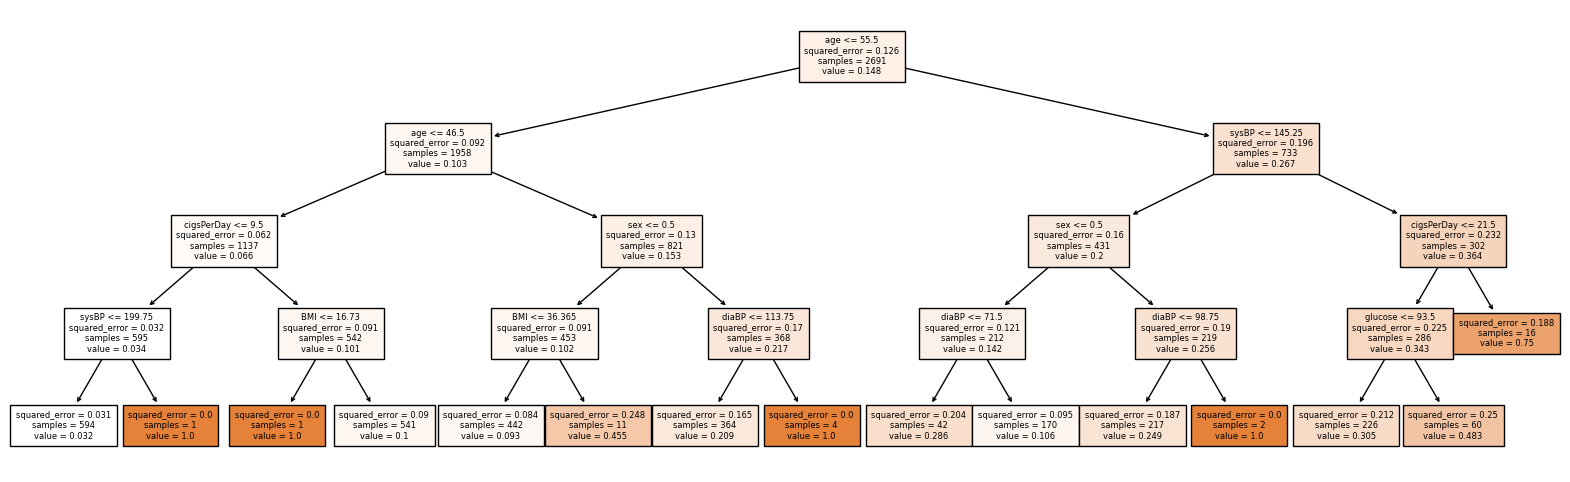

Rsq for tree depth of 4: 0.09942942210078543
RMSE for tree depth of 4: 0.3346348027061041


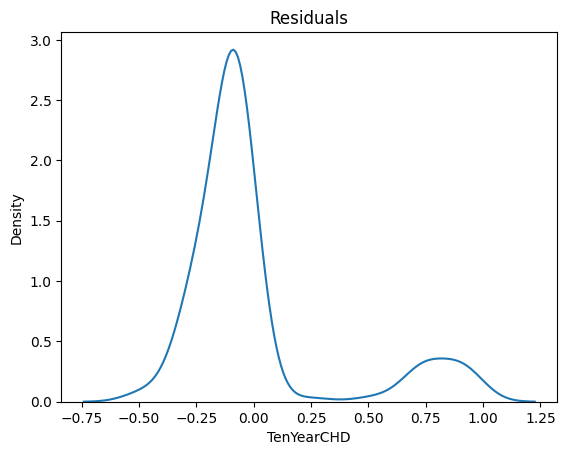

Accuracy:  0.8643326039387309 


 Confusion matrix: 
col_0       0.0  1.0
TenYearCHD          
0           781    0
1           124    9

 Feature importance: 


,variable,importance
0,sex,0.102660
1,currentSmoker,0.000000
2,cigsPerDay,0.094969
3,diabetes,0.000000
4,totChol,0.000000
5,sysBP,0.142997
6,diaBP,0.116440
7,BMI,0.055027
8,age,0.450554
9,prevalentStroke,0.000000


In [7]:
# process data
y = train_final1['TenYearCHD']
vars =  ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose','BPMeds','education']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

cart = DecisionTreeRegressor(max_depth=4,criterion='squared_error',min_samples_split=20,random_state=1)
cart = cart.fit(X,y) # fit the regression
# visualize results
var_names = cart.feature_names_in_
plt.figure(figsize=(20,6))
plot_tree(cart, filled=True, feature_names=var_names, fontsize=6)
plt.show()

# make predictions on the test set
y_hat = cart.predict(X_test)

# residuals, rsq, rmse
e = y_test - y_hat
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
RMSE = np.sqrt(np.mean(e**2))

print(f'Rsq for tree depth of 4: {rsq}')
print(f'RMSE for tree depth of 4: {RMSE}')

# plot the residuals
sns.kdeplot(e)
plt.title("Residuals")
plt.show()

## Confusion Matrix
y_hat[y_hat < 0.5] = 0
y_hat[y_hat >= 0.5] = 1
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
#acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')

print('\n', 'Confusion matrix: ')
print(pd.crosstab(y_test,y_hat))

# use the feature importances to see which variables matter the most
print('\n', 'Feature importance: ')
results = pd.DataFrame({'variable':vars, 'importance': cart.feature_importances_}) # Regression coefficients
results

We found the best regression tree when we included all explanatory variables in the model, with an R-squared of 0.0994 and RMSE of 0.335. The residuals are bimodal and not centered around zero. They are also not normally distributed, suggesting that the model likely has issues and is not a good predictor for TenYearCHD. This could involve violating assumptions, biases (e.g., residuals are often negative), etc.

We created a confusion matrix by assigning predicted TenYearCHD < 0.5 to 0 and >= 0.5 to 1. The model correctly predicted a TenYearCHD of 0, 781 times (True Negative) and a TenYearCHD of 1, 9 times (True Positive). The model incorrectly assigned a TenYearCHD of 1 when the actual value was 0, 124 times (False Positive), and it incorrectly assigned a TenYearCHD of 0 when the actual value was 1, 0 times (False Negative). Based on this, the accuracy of the model is 86%.

Overall, the decision tree model is more effective at predicting TenYearCHD than MLR. The most influential variable in the decision tree is age.

**KNN**

Finally, we test KNN to predict TenYearCHD. We first identify the optimal k based on the MSE and SSE, shown below. We find that the optimal k is 153.

k: 3, MSE: 124.0
k: 10, MSE: 110.80000000000001
k: 25, MSE: 108.74080000000001
k: 50, MSE: 107.27120000000001
k: 100, MSE: 107.2928
k: 101, MSE: 107.2153710420547
k: 125, MSE: 106.95436800000002
k: 150, MSE: 106.45657777777777
k: 200, MSE: 106.83737500000001
k: 300, MSE: 107.1123111111111
[153]


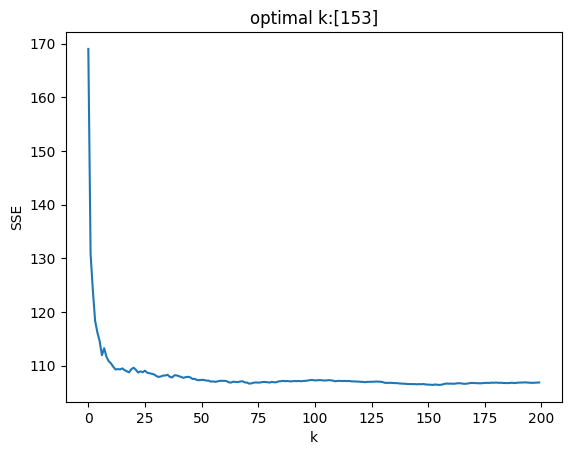

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Splitting Sample
y_train = train_final1['TenYearCHD']
x_train = train_final1.drop('TenYearCHD', axis=1)

y_test = test_final1['TenYearCHD']
x_test = test_final1.drop('TenYearCHD', axis=1)

#Maxmin Normlize
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#KNN Regressor
for k in [3, 10, 25, 50, 100, 101, 125, 150, 200, 300]:
  model = KNeighborsRegressor(n_neighbors=k).fit(x_train_scaled, y_train)
  yhat = model.predict(x_test_scaled)
  mse = np.sum((y_test - yhat)**2)
  print('k: '+str(k)+', MSE: '+str(mse))

#Optimal K for the data
kbar = 200
kgrid = np.arange(1,kbar)
SSE = np.zeros(kbar)

for k in range(kbar):
  fitModel = KNeighborsRegressor(n_neighbors=k+1).fit(x_train_scaled, y_train)
  yhat = fitModel.predict(x_test_scaled) #Predict for values test
  SSE[k] = np.sum((y_test - yhat)**2)

SSEmin = np.min(SSE) #Lowest SSE
minIndex = np.where(SSE==SSEmin)
kstar = kgrid[minIndex]
print(kstar)

plt.plot(np.arange(0,kbar), SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(kstar))
plt.ylabel('SSE')
plt.show()

We retrained the KNN model using the optimal k and all explanatory variables. The R-squared is 0.064, and the RMSE is 0.341. As such, the model is less effective than MLR and decision trees at predicting TenYearCHD. This may be due to complex relationships between predictors and TenYearCHD, making KNN less effective.

106.38100730488274


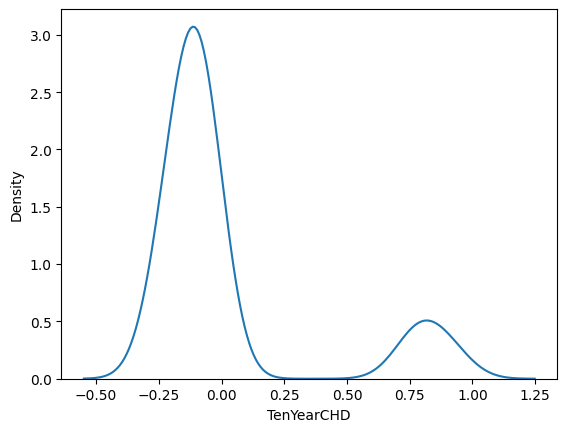

R-squared: 0.06396207803710885
RMSE: 0.3411606642065305


In [9]:
#Re-training the model with the best K value
model1 = KNeighborsRegressor(n_neighbors=153).fit(x_train_scaled, y_train)
yhat1 = model1.predict(x_test_scaled)
mse = np.sum((y_test - yhat1)**2)
print(mse)
#The mean-squared error of a KNN model with k=153 is 106

#Residuals, R-Squared, RMSE
error = y_test - yhat1
sns.kdeplot(error)
plt.show()
rsq = 1-np.sum(error**2)/np.sum((y_test-np.mean(y_train))**2)
rmse = np.sqrt(np.mean(error**2))

print('R-squared:', rsq)
print('RMSE:', rmse)

**Main results**

Overall, we find that our decision tree model with a depth of 4 and all explanatory variables has the best performance, with an $R^2$ of 0.0994. The models suggest that different variables are the most important predictors for TenYearCHD. The MLR model indicates that the most important variables are prevalentStroke and sex, while the decision tree suggests the most influential variables are age, sysBP, and diaBP. Sex remains an influential variable in the decision tree model. The differences may be based on the type of relationships present between the explanatory variables and TenYearCHD. For example, it is possible that age, sysBP, and diaBP have complex or partially nonlinear relationships with TenYearCHD that are not represented in the MLR model.

| | Linear Regression | Decision Tree |  KNN |
|-----------------|-----------------|-----------------| -----------------|
| $R^2$  | 0.09774    | 0.09943    |  0.06396    |
| RMSE    | 0.33494   | 0.33463    |  0.34116   |

## **Conclusion**

The Framingham Heart Study, which began in 1947 in Framingham, Massachusetts, aimed to deepen our understanding of the factors contributing to cardiovascular disease (CVD). Spanning over 70 years and still ongoing, the study received a $38 million grant in 2019 for another 6 years, highlighting its continued relevance and impact. In our project, we further explored the roles of various hereditary, environmental, and time-related factors in an individual's risk of developing coronary heart disease (CHD). Our analysis revealed that using all predictor variables yielded the highest Rsq value, making it the optimal approach for predicting the binary outcome variable TenYearCHD, where 0 indicates no CHD development within 10 years and 1 signifies CHD development. We employed three predictive methods—regression trees, k nearest neighbors, and multiple linear regression—and carefully optimized each model to avoid overfitting or underfitting. For instance, we determined that a tree depth of 5 was optimal for the regression tree method, while k=153 yielded the lowest mean squared error for KNN. This meticulous parameter tuning ensured that our models were neither overly complex nor too simplistic, effectively capturing the relationship between predictors and the outcome variable TenYearCHD. Among the methods applied, regression trees emerged with the highest Rsq value of 0.099, with all features contributing to the model's performance, and an optimal tree depth of 4.

Our project focuses on predicting the likelihood of developing coronary heart disease using data from the Framingham Heart Study. A reputable study and has provided key insights into cardiovascular health over the past 70 years. The use of this dataset adds historical context and reliability to our findings, seeing as it has been in use for so long. Additionally, by initially narrowing our variables for analysis to relevant predictors that cause coronary heart disease (taken from the CDC and NIH), we were able to conduct a detailed and focused analysis. By utilizing multiple predictive methods (multiple linear regression, regression trees, and KNN) we ensured that our analysis was robust and accounted for the various potential factors that could cause CHD.

Future work can be done to provide more comprehensive findings and results. While our project has provided some insights into predicting CHD risk, there are many ways to improve the analysis as a whole. It would be interesting to explore and incorporate advanced machine learning techniques such as bagging, boosting, or neural networks to see if they provide more comprehensive results. Also, if we were able to research and include more factors that were highly correlated with the risk of CHD, it might provide more readily understandable results.